### Name: KHUN Dararith
### ID: M060813

# <center>ASSOCIATION RULE <br><br>Using FP-Growth Algorithm</center>


FP-growth is an improved version of the Apriori algorithm, widely used for frequent pattern mining. It is used as an analytical process that finds frequent patterns or associations from data sets.

In [21]:
pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.


In [22]:
pip install plotly

     |████████████████████████████████| 15.2 MB 256 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from getpass import getpass
%matplotlib inline

In [2]:
user_name = input("Enter user name: ")
password = getpass("Enter password: ")

connection = mysql.connector.connect(host = "localhost",
                                    user = user_name,
                                    passwd = password,
                                    database = "FP_growth")


Enter user name: root
Enter password: ········


In [3]:
connection

In [4]:
table = pd.read_sql_query('SHOW TABLES FROM FP_growth', connection)
table

,Tables_in_fp_growth
0,house_price_prediction
1,market_basket_optimisation


In [5]:
db = table['Tables_in_fp_growth']

In [6]:
for tb_name in db:
    if(tb_name == "market_basket_optimisation"):
        out = pd.read_sql_query('DESCRIBE {}'.format(tb_name), connection)
        print(tb_name)
        print(out)

market_basket_optimisation
                Field       Type Null Key Default Extra
0              shrimp    b'text'  YES        None      
1             almonds    b'text'  YES        None      
2             avocado    b'text'  YES        None      
3      vegetables mix    b'text'  YES        None      
4        green grapes    b'text'  YES        None      
5    whole weat flour     b'int'  YES        None      
6                yams     b'int'  YES        None      
7      cottage cheese     b'int'  YES        None      
8        energy drink     b'int'  YES        None      
9        tomato juice     b'int'  YES        None      
10     low fat yogurt     b'int'  YES        None      
11          green tea     b'int'  YES        None      
12              honey     b'int'  YES        None      
13              salad     b'int'  YES        None      
14      mineral water     b'int'  YES        None      
15             salmon     b'int'  YES        None      
16  antioxydant juice

In [7]:
datasets = pd.read_sql('SELECT * FROM FP_growth.market_basket_optimisation', con=connection)
datasets.shape
connection.close()

In [11]:
dataset = pd.DataFrame(datasets)
datasets.head(10)

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
1,chutney,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
2,turkey,avocado,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
3,mineral water,milk,energy bar,whole wheat rice,green tea,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
4,low fat yogurt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
5,whole wheat pasta,french fries,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
6,soup,light cream,shallot,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
7,frozen vegetables,spaghetti,green tea,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
8,french fries,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
9,eggs,pet food,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0


In [12]:
type(dataset)

pandas.core.frame.DataFrame

In [10]:
import numpy as np

# Gather All Items of Each Transactions into Numpy Array
transaction = []
for i in range(0, dataset.shape[0]):
    for j in range(0, dataset.shape[1]):
        transaction.append(dataset.values[i,j])

# converting to numpy array
transaction = np.array(transaction)
print(transaction)

['burgers' 'meatballs' 'eggs' ... '0' '0' '0.0']


In [22]:
#  Transform Them a Pandas DataFrame
df = pd.DataFrame(transaction, columns=["items"]) 

# Put 1 to Each Item For Making Countable Table, to be able to perform Group By
df["incident_count"] = 1 

#  Delete NaN Items from Dataset
indexNames = df[df['items'] == '0'].index
df.drop(indexNames , inplace=True)

indexNames = df[df['items'] == '0.0'].index
df.drop(indexNames , inplace=True)

# Making a New Appropriate Pandas DataFrame for Visualizations  
df_table = df.groupby("items").sum().sort_values("incident_count", ascending=False).reset_index()

#  Initial Visualizations
df_table.head(5).style.background_gradient(cmap='Blues')


,items,incident_count
0,mineral water,916
1,eggs,802
2,french fries,774
3,chocolate,639
4,spaghetti,577


In [23]:
import plotly.express as px

# to have a same origin
df_table["all"] = "Top 50 items" 

# creating tree map using plotly
fig = px.treemap(df_table.head(50), path=['all', "items"], values='incident_count',
                  color=df_table["incident_count"].head(50), hover_data=['items'],
                  color_continuous_scale='Blues',
                )
# ploting the treemap
fig.show()

In [24]:
# Transform Every Transaction to Seperate List & Gather Them into Numpy Array
transaction = []
for i in range(dataset.shape[0]):
    transaction.append([str(dataset.values[i,j]) for j in range(dataset.shape[1])])

# creating the numpy array of the transactions
transaction = np.array(transaction)

# importing the required module
from mlxtend.preprocessing import TransactionEncoder

# initializing the transactionEncoder
te = TransactionEncoder()
te_ary = te.fit(transaction).transform(transaction)
dataset = pd.DataFrame(te_ary, columns=te.columns_)

# dataset after encoded
dataset.head()

,0,0.0,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,True,False,False,False,True,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [25]:
# select top 30 items
first30 = df_table["items"].head(30).values 

# Extract Top 30
dataset = dataset.loc[:,first30] 

# shape of the dataset
dataset.shape

(5637, 30)

In [45]:
#Importing Libraries
from mlxtend.frequent_patterns import fpgrowth

#running the fpgrowth algorithm
res=fpgrowth(dataset,min_support=0.05, use_colnames=True)

# printing top 10
res.head(10)

,support,itemsets
0,0.142274,(eggs)
1,0.056058,(burgers)
2,0.162498,(mineral water)
3,0.096150,(green tea)
4,0.076104,(milk)
5,0.055881,(low fat yogurt)
6,0.137307,(french fries)
7,0.102359,(spaghetti)
8,0.051091,(frozen vegetables)
9,0.082313,(cookies)


In [ ]:
# importing required module
from mlxtend.frequent_patterns import association_rules

# creating asssociation rules
res=association_rules(res, metric="lift", min_threshold=1)

# printing association rules
res

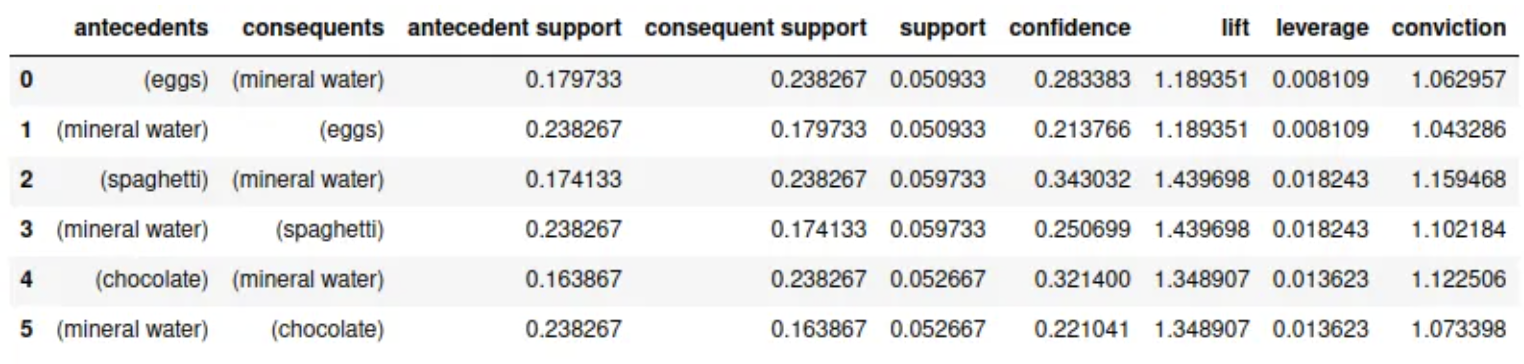

In [48]:
from IPython import display
display.Image(img)